In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Loading and basic information

In [9]:
def process_sample(sample: str):
    lines = sample.split('\n')
    words = []
    ner_labels = []
    for line in lines:
        split_line = line.split(' ')
        words.append(split_line[0])
        ner_labels.append(split_line[-1])
    return {'words': words, 'labels': ner_labels}

In [10]:
data_path = 'data/train.txt'
with open(data_path, 'r') as fin:
    data = fin.read().split('\n\n')

processed_samples = []
for doc in data:
    if doc.startswith('-DOCSTART-'):
            continue
    red_sample = process_sample(doc)
    processed_samples.append(red_sample)

data = pd.DataFrame(processed_samples, columns=['words', 'labels'])
data.head()

,words,labels
0,"[EU, rejects, German, call, to, boycott, Briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]"
1,"[Peter, Blackburn]","[B-PER, I-PER]"
2,"[BRUSSELS, 1996-08-22]","[B-LOC, O]"
3,"[The, European, Commission, said, on, Thursday...","[O, B-ORG, I-ORG, O, O, O, O, O, O, B-MISC, O,..."
4,"[Germany, 's, representative, to, the, Europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P..."


In [11]:
template = 'Number of rows: {}, number of columns: {}'
print('Data:', template.format(len(data.index), len(data.columns)))

Data: Number of rows: 14042, number of columns: 2


## Quantity analisys

In [16]:
class_labels = ['MISC', 'PER', 'ORG', 'LOC', 'Background']

In [17]:
def find_labels(labels: list):
    labels_count = [0] * len(class_labels)
    for token in labels:
        if token.startswith('B-') or token.startswith('I-'):
            class_name = token[2:]
            class_index = class_labels.index(class_name)
            labels_count[class_index] += 1
        elif token == 'O':
            labels_count[-1] += 1
    return labels_count

In [18]:
class_counts = data['labels'].map(find_labels)
class_counts = pd.DataFrame(np.array(class_counts.to_list()), columns=class_labels)
class_counts = class_counts.sum()
class_counts

MISC            4593
PER            11128
ORG            10025
LOC             8297
Background    169578
dtype: int64

### As we can see, we have a huge class disbalance (most tokens are non-labeled)

### Let's look at distribution of labeled tokens

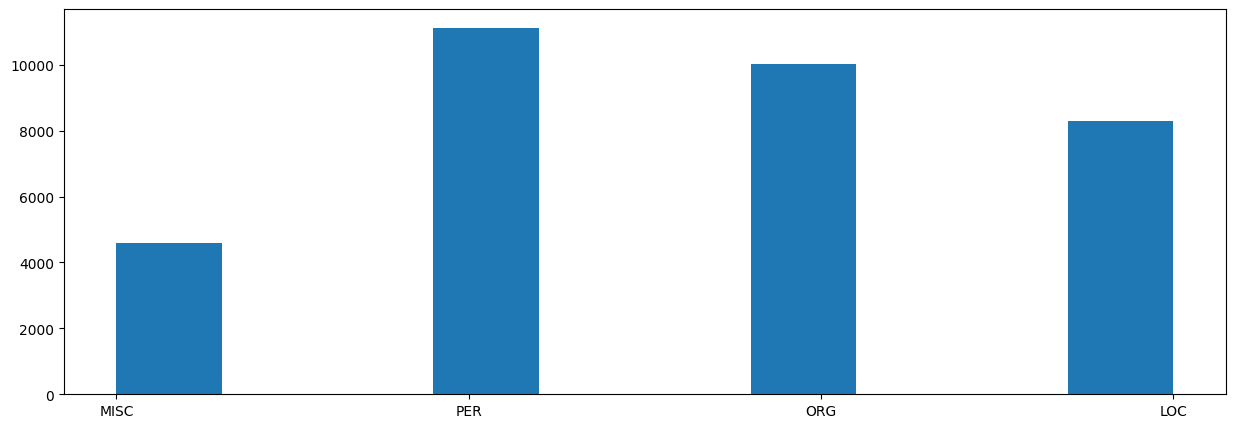

In [19]:
plt.figure(figsize=(15, 5))
plt.hist(class_labels[:-1], weights=class_counts[:-1])
None

### We haven'thuge disbalance in a labeled data

### Let's look at lengths of texts

In [21]:
text_lens = data["labels"].map(len)
text_lens.describe()

count    14042.000000
mean        14.500926
std         11.602902
min          1.000000
25%          6.000000
50%         10.000000
75%         22.000000
max        113.000000
Name: words, dtype: float64

### We have a small texts that can be easy to process for all base models, such as BERT